You can download the data used form this link:
https://statso.io/forecasting-website-traffic-case-study/#google_vignette

In [37]:
import pandas as pd

data = pd.read_csv("Web_traffic Data/Forecasting Web Traffic Data.csv", on_bad_lines='skip')
data["Date"] = pd.to_datetime(data["Date"], format="%d/%m/%Y")
data.set_index("Date", inplace=True)
data.head()

,Views
Date,
2021-06-01,7831
2021-06-02,7798
2021-06-03,7401
2021-06-04,7054
2021-06-05,7973


In [38]:
import matplotlib.pyplot as plt

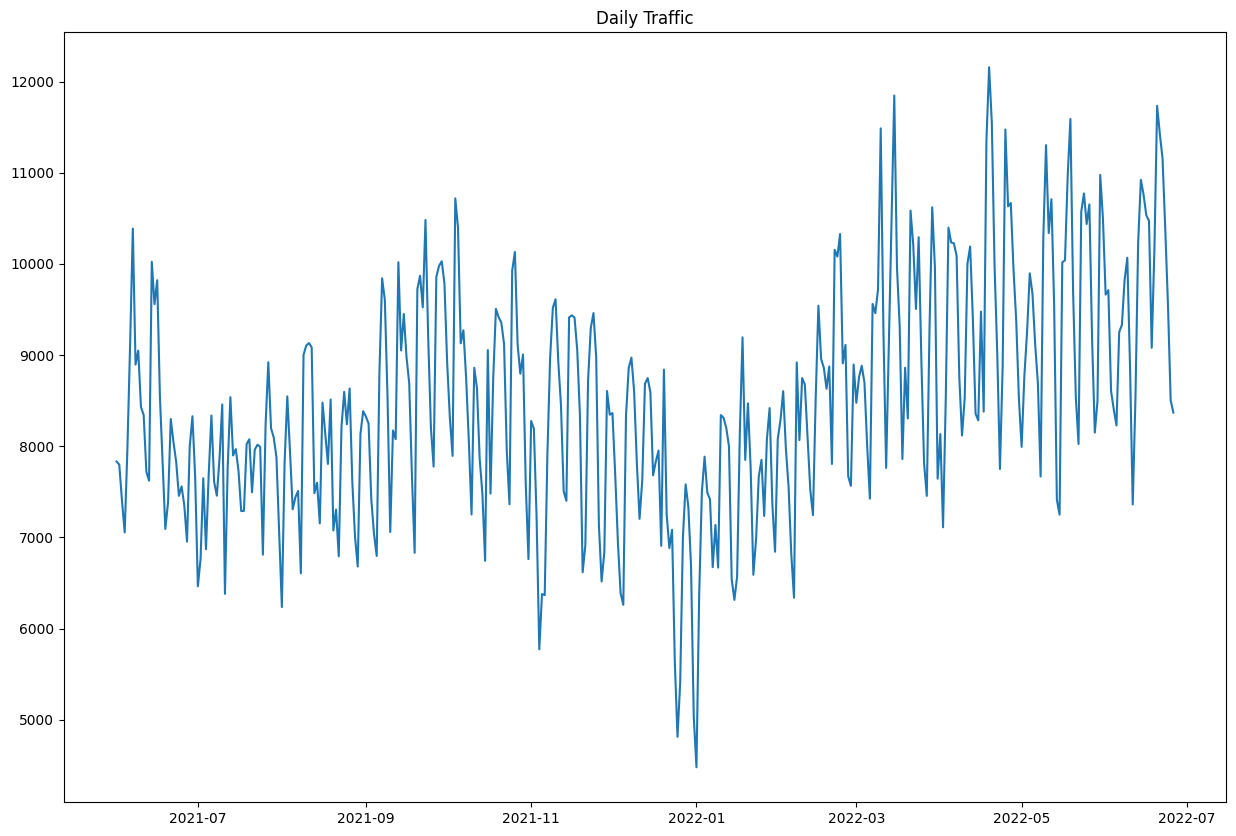

In [39]:
plt.figure(figsize=(15, 10))
plt.plot(data["Views"])
plt.title("Daily Traffic")
plt.show()

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

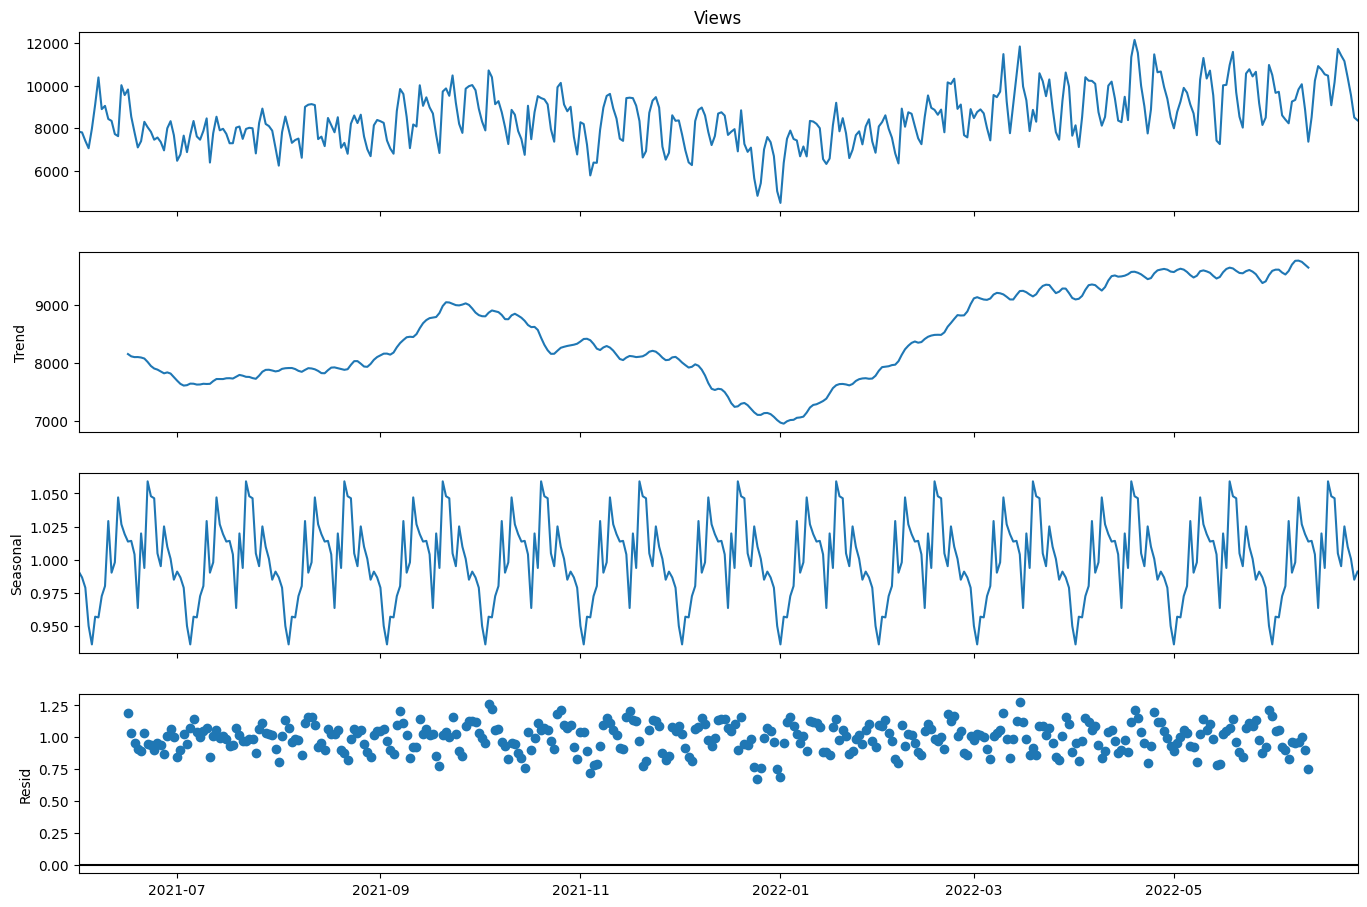

In [41]:
result = seasonal_decompose(data['Views'], model='multiplicative', period=30)
fig = result.plot()
fig.set_size_inches(15, 10)
plt.show()

From the above data we can see that the traffic for this website is seasonal

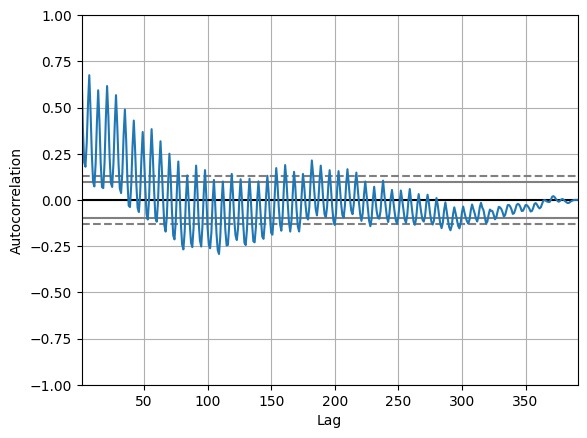

In [42]:
pd.plotting.autocorrelation_plot(data["Views"])
plt.show()

For the p value we can see that there are only 5 points above 0 in the previous graph. so p will be = to 5

In [43]:
from statsmodels.graphics.tsaplots import plot_pacf

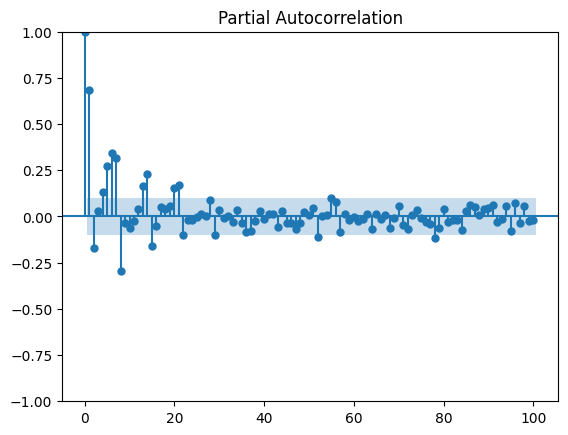

In [44]:
plot_pacf(data["Views"], lags = 100)
plt.show()

For q value: we can see that there are two outlier points. so q = 2 

In [45]:
import statsmodels.api as sm

In [46]:
train_data = data.iloc[:-30]
test_data = data.iloc[-30:]

In [47]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [48]:
p, d, q = 5, 1, 2
model = SARIMAX(train_data['Views'],
                order=(p, d, q),
                seasonal_order=(p, d, q, 12))

a:\Pycharm\pycharm\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
a:\Pycharm\pycharm\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [49]:
model = model.fit()

a:\Pycharm\pycharm\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
a:\Pycharm\pycharm\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [50]:
predictions = model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)
test_data['Predictions'] = predictions

C:\Users\amrk6\AppData\Local\Temp\ipykernel_27972\1833989203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predictions'] = predictions


In [51]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [52]:
# Calculate the average and median values of the actual data
mae = mean_absolute_error(test_data['Views'], test_data['Predictions'])
rmse = np.sqrt(mean_squared_error(test_data['Views'], test_data['Predictions']))

average_views = data['Views'].mean()
median_views = data['Views'].median()

print(f"Average Views: {average_views}")
print(f"Median Views: {median_views}")
print(f"Mean Absolute Error (MAE) as a percentage of average views: {mae / average_views * 100:.2f}%")
print(f"Root Mean Squared Error (RMSE) as a percentage of average views: {rmse / average_views * 100:.2f}%")


Average Views: 8482.606138107416
Median Views: 8363.0
Mean Absolute Error (MAE) as a percentage of average views: 9.97%
Root Mean Squared Error (RMSE) as a percentage of average views: 11.69%


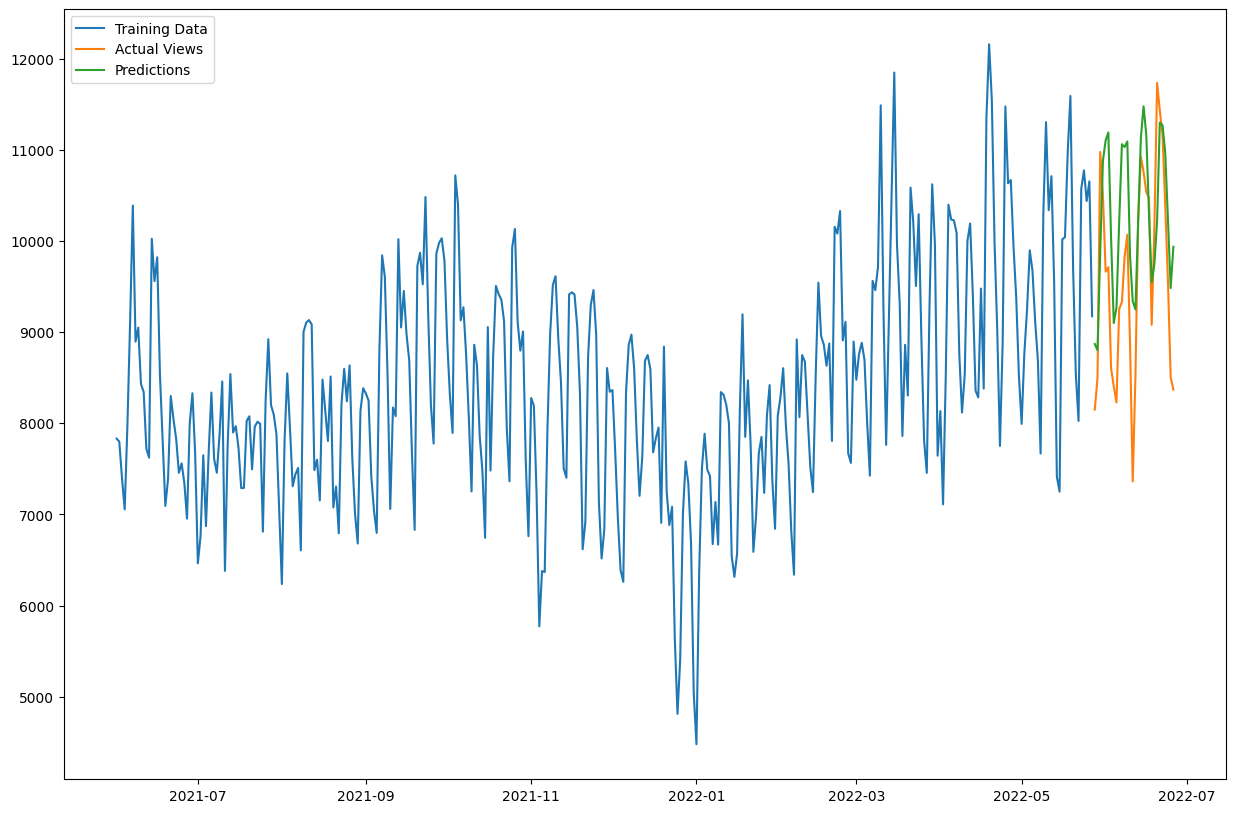

In [53]:
plt.figure(figsize=(15, 10))
plt.plot(train_data['Views'], label='Training Data')
plt.plot(test_data['Views'], label='Actual Views')
plt.plot(test_data['Predictions'], label='Predictions')
plt.legend()
plt.show()
